# House Price Prediction                                          JEYADEV K  -  21MID0072

# Import libraries and Collect data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import linear_model
from sklearn.metrics import accuracy_score
%matplotlib inline

# Reading the Dataset

In [5]:
df=pd.read_csv("demo3.csv")

In [6]:
df


,area,bedroom,age,price
0,2600,3.0,20,5500
1,3000,4.0,15,5650
2,3200,NaN,18,6100
3,3600,3.0,30,5950
4,4000,5.0,8,7600


# Data Preparation

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   area     5 non-null      int64  
 1   bedroom  4 non-null      float64
 2   age      5 non-null      int64  
 3   price    5 non-null      int64  
dtypes: float64(1), int64(3)
memory usage: 292.0 bytes


In [8]:
df.isnull()

,area,bedroom,age,price
0,False,False,False,False
1,False,False,False,False
2,False,True,False,False
3,False,False,False,False
4,False,False,False,False


In [9]:
df.isnull().sum()

area       0
bedroom    1
age        0
price      0
dtype: int64

In [10]:
df.bedroom.median()

3.5

In [11]:
import math
median_bedroom=math.floor(df.bedroom.median())
median_bedroom

3

In [12]:
#Jeyadev K 21MID0072
df.bedroom.fillna(median_bedroom)

0    3.0
1    4.0
2    3.0
3    3.0
4    5.0
Name: bedroom, dtype: float64

In [13]:
df.bedroom=df.bedroom.fillna(median_bedroom)

In [14]:
df


,area,bedroom,age,price
0,2600,3.0,20,5500
1,3000,4.0,15,5650
2,3200,3.0,18,6100
3,3600,3.0,30,5950
4,4000,5.0,8,7600


In [15]:
df.isnull().sum()

area       0
bedroom    0
age        0
price      0
dtype: int64

Text(0.5, 1.0, 'House_price_prediction')

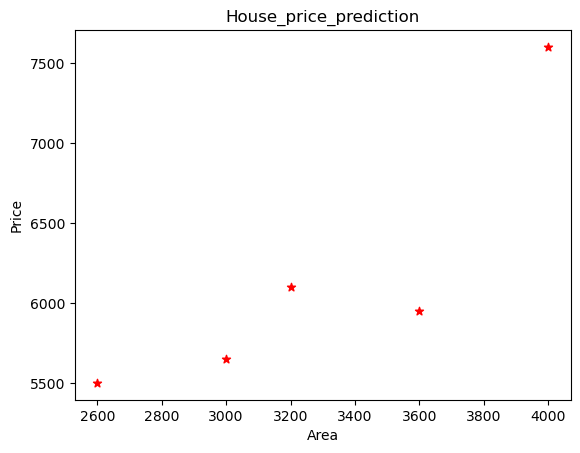

In [16]:
plt.scatter(df.area,df.price,color="red",marker="*")
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("House_price_prediction")

Text(0.5, 1.0, 'House_price_prediction')

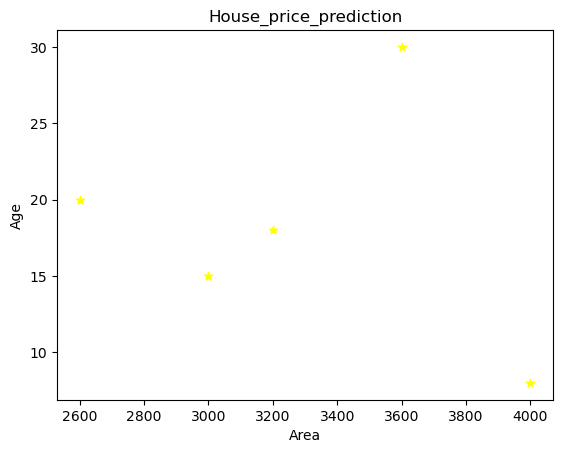

In [17]:
plt.scatter(df.area,df.age,color="Yellow",marker="*")
plt.xlabel("Area")
plt.ylabel("Age")
plt.title("House_price_prediction")

Text(0.5, 1.0, 'House_price_prediction')

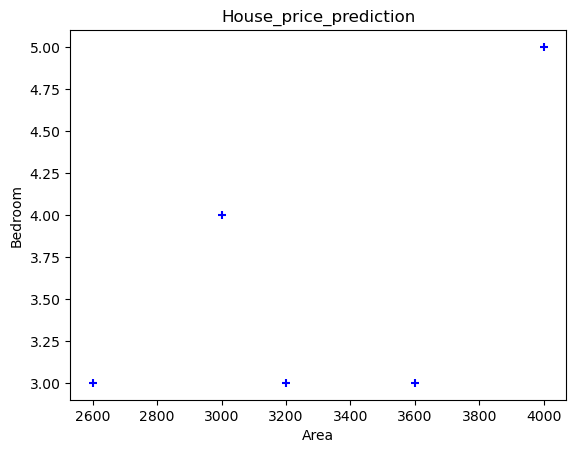

In [18]:
plt.scatter(df.area,df.bedroom,color="Blue",marker="+")
plt.xlabel("Area")
plt.ylabel("Bedroom")
plt.title("House_price_prediction")

In [19]:
df.to_csv("demo3new.csv")
dt=pd.read_csv("demo3new.csv")
dt

,Unnamed: 0,area,bedroom,age,price
0,0,2600,3.0,20,5500
1,1,3000,4.0,15,5650
2,2,3200,3.0,18,6100
3,3,3600,3.0,30,5950
4,4,4000,5.0,8,7600


In [20]:
#Jeyadev K 21MID0072
from sklearn.linear_model import LinearRegression
reg=linear_model.LinearRegression()
reg.fit(df[['area','bedroom','age']],df.price)

LinearRegression()

In [21]:
reg.predict([[4000,4,35]])

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([5897.5])

In [22]:
reg.coef_

array([   1.3725, -260.25  ,  -68.25  ])

In [23]:
reg.intercept_

3837.249999999999

# Check the Accuracy Score

In [24]:
x=df[['area','bedroom','age']]
y=df.price

In [25]:
reg.score(x,y)*100

94.888178913738

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor as rf
from sklearn.metrics import mean_squared_error

In [29]:
X = dt.drop('price', axis=1)
y = dt['price']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# Creating and training the Random Forest model
rf_model = rf(n_estimators=100, random_state=50)
rf_model.fit(X_train, y_train)

# Making predictions
predictions=rf_model.predict(X_test)


In [30]:
# Calculating Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error (MSE):",mse)

Mean Squared Error (MSE): 2025.0
